In [1]:
import pandas as pd
import spacy
import joblib
import matplotlib.pyplot as plt

loaded_model = joblib.load('gender_predictor.pkl')
df = pd.read_csv('Reviews.csv')
nlp = spacy.load('en_core_web_sm')

C:\Users\Alien 7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.2.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Alien 7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.2.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\

This product is popular among both males and females.


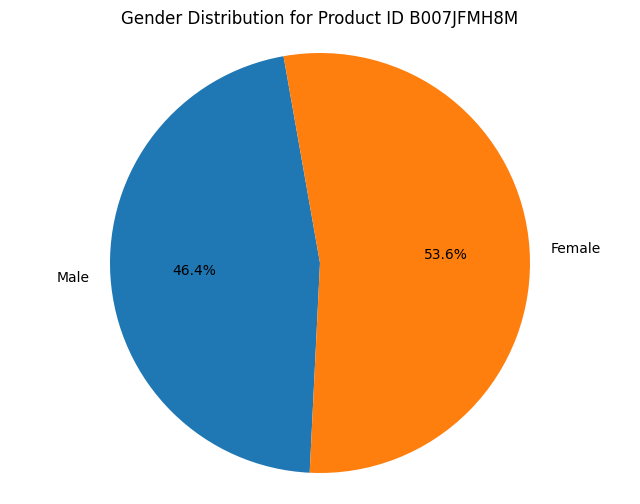


Top Pros:
     Pros  Mentions
    yummy       118
     soft        73
delicious        22
  oatmeal        14
    tasty        11

Top Cons:
   Cons  Mentions
    dry         2
  handy         1
oatmeal         1
   much         1
healthy         1


In [18]:
# Change to user input/desired productId
productId = 'B007JFMH8M'

pros = {}
cons = {}

def analyze_review(review, rating):    
    # Extract adjectives (possible pros/cons)
    doc = nlp(review)
    excluded_words = ['good', 'bad', 'great', 'amazing', 'wonderful', 'best', 'many']
    aspects = [token.text.lower() for token in doc if token.pos_ == 'ADJ' and token.text.lower() not in excluded_words]

    # Positive Review
    if rating >= 4:
        for aspect in aspects:
            pros[aspect] = pros.get(aspect, 0) + 1
    # Negative review
    elif rating <= 2:
        for aspect in aspects:
            cons[aspect] = cons.get(aspect, 0) + 1
    
    return

def predict_gender(name):
    predicted_gender = loaded_model.predict([name.lower()])
    if predicted_gender[0] == 0:
        return('Male')
    else:
        return('Female')

# Extract Pros/Cons and Gender from each matching productId
df.loc[df['ProductId'] == productId, 'Extracted Aspects'] = df[df['ProductId'] == productId].apply(lambda row: analyze_review(row['Summary'], row['Score']), axis=1)
df.loc[df['ProductId'] == productId, 'Gender'] = df[df['ProductId'] == productId].apply(lambda row: predict_gender(row['ProfileName']), axis=1)

# Calculate gender proportion
num_reviews = len(df[(df['ProductId'] == productId)])
num_males = len(df[(df['ProductId'] == productId) & (df['Gender'] == 'Male')])
male_proportion = num_males / num_reviews

# Create DataFrames for Pros and Cons for visualization
top_pros = dict(sorted(pros.items(), key=lambda item: item[1], reverse=True)[:5])  # Top 5 Pros
top_cons = dict(sorted(cons.items(), key=lambda item: item[1], reverse=True)[:5])  # Top 5 Cons
pros_df = pd.DataFrame(list(top_pros.items()), columns=['Pros', 'Mentions'])
cons_df = pd.DataFrame(list(top_cons.items()), columns=['Cons', 'Mentions'])

# Output results
if male_proportion < 0.4:
    print('This product is most popular among females.')
elif male_proportion < 0.6:
    print('This product is popular among both males and females.')
else:
    print('This product is most popular among males')

# Pie chart data
labels = ['Male', 'Female']
sizes = [num_males, num_reviews-num_males]
colors = ['#1f77b4', '#ff7f0e']  # Blue for Male, Orange for Female

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=100)
plt.title('Gender Distribution for Product ID {}'.format(productId))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

print('\nTop Pros:')
print(pros_df.to_string(index=False))

print('\nTop Cons:')
print(cons_df.to_string(index=False))